## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
import numpy as np

# # Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

In [5]:
print('shape of x_train:\n',x_train.shape)
print('shape of x_test:\n',x_test.shape)
print('shape of y_train:\n',y_train.shape)
print('shape of y_test:\n',y_test.shape)

shape of x_train:
 (50000, 32, 32, 3)
shape of x_test:
 (10000, 32, 32, 3)
shape of y_train:
 (50000, 1)
shape of y_test:
 (10000, 1)


In [6]:
len(x_train)

50000

In [7]:
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
print('shape of x_train:\n',x_train.shape)
print('shape of x_test:\n',x_test.shape)
print('shape of y_train:\n',y_train.shape)
print('shape of y_test:\n',y_test.shape)

shape of x_train:
 (50000, 3072)
shape of x_test:
 (10000, 3072)
shape of y_train:
 (50000, 10)
shape of y_test:
 (10000, 10)


In [9]:
Dense = keras.layers.Dense

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])            
    
    return model

In [10]:
## 超參數設定
LEARNING_RATE = [0.1, 0.01, 0.001, 0.0001, 0.00001]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0, 0.5, 0.95]

In [11]:
results = {}
for mom in MOMENTUM:
    for lr in LEARNING_RATE:
        keras.backend.clear_session()
        print("Experiment with LR=%.5f , MOMENTUM=%.2f,  nesterov=True" % (lr, mom))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=mom)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train,
                 epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data=(x_test,y_test),
                 shuffle=True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        exp_name_tag = "exp-mom-"+str(mom)+"-lr-"+str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR=0.10000 , MOMENTUM=0.00,  nesterov=True
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
I

Epoch 48/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.7692 - acc: 0.7265 - val_loss: 1.7491 - val_acc: 0.4877
Epoch 49/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.7588 - acc: 0.7307 - val_loss: 1.8345 - val_acc: 0.4600
Epoch 50/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.7395 - acc: 0.7374 - val_loss: 1.6372 - val_acc: 0.5043
Experiment with LR=0.01000 , MOMENTUM=0.00,  nesterov=True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________________________________

50000/50000 [==============================] - 5s 107us/step - loss: 1.2330 - acc: 0.5671 - val_loss: 1.5529 - val_acc: 0.4581
Epoch 50/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2245 - acc: 0.5720 - val_loss: 1.4894 - val_acc: 0.4741
Experiment with LR=0.00100 , MOMENTUM=0.00,  nesterov=True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense) 

50000/50000 [==============================] - 5s 102us/step - loss: 1.6710 - acc: 0.4198 - val_loss: 1.6751 - val_acc: 0.4214
Experiment with LR=0.00010 , MOMENTUM=0.00,  nesterov=True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
____________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.3191 - acc: 0.1035 - val_loss: 2.3163 - val_acc: 0.1044
Epoch 2/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.3158 - acc: 0.1064 - val_loss: 2.3131 - val_acc: 0.1078
Epoch 3/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.3127 - acc: 0.1082 - val_loss: 2.3102 - val_acc: 0.1081
Epoch 4/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.3098 - acc: 0.1107 - val_loss: 2.3074 - val_acc: 0.1121
Epoch 5/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.3071 - acc: 0.1132 - val_loss: 2.3048 - val_acc: 0.1152
Epoch 6/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.3046 - acc: 0.1163 - val_loss: 2.3024 - val_acc: 0.1183
Epoch 7/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.3021 - acc: 0.1188 - val_loss: 2.3001 - 

50000/50000 [==============================] - 6s 111us/step - loss: 2.0834 - acc: 0.2384 - val_loss: 1.9194 - val_acc: 0.2960
Epoch 2/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.8658 - acc: 0.3311 - val_loss: 1.7676 - val_acc: 0.3538
Epoch 3/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.7501 - acc: 0.3728 - val_loss: 1.8054 - val_acc: 0.3482
Epoch 4/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.6866 - acc: 0.3967 - val_loss: 1.7250 - val_acc: 0.3804
Epoch 5/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.6232 - acc: 0.4180 - val_loss: 1.6909 - val_acc: 0.3812
Epoch 6/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.5773 - acc: 0.4354 - val_loss: 1.6525 - val_acc: 0.3995
Epoch 7/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.5337 - acc: 0.4518 - val_loss: 1.5423 - val_acc: 0.4499
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 109us/step - loss: 1.8107 - acc: 0.3604 - val_loss: 1.8276 - val_acc: 0.3459
Epoch 3/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.7370 - acc: 0.3856 - val_loss: 1.7364 - val_acc: 0.3839
Epoch 4/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.6889 - acc: 0.4017 - val_loss: 1.7700 - val_acc: 0.3666
Epoch 5/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.6498 - acc: 0.4176 - val_loss: 1.6661 - val_acc: 0.4202
Epoch 6/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.6168 - acc: 0.4319 - val_loss: 1.6082 - val_acc: 0.4300
Epoch 7/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.5851 - acc: 0.4402 - val_loss: 1.6324 - val_acc: 0.4206
Epoch 8/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.5611 - acc: 0.4508 - val_loss: 1.6042 - val_acc: 0.4276
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 109us/step - loss: 2.0388 - acc: 0.2832 - val_loss: 2.0122 - val_acc: 0.2952
Epoch 4/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.9869 - acc: 0.3045 - val_loss: 1.9664 - val_acc: 0.3181
Epoch 5/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.9473 - acc: 0.3205 - val_loss: 1.9328 - val_acc: 0.3225
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.9173 - acc: 0.3310 - val_loss: 1.9062 - val_acc: 0.3321
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.8928 - acc: 0.3386 - val_loss: 1.8831 - val_acc: 0.3423
Epoch 8/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.8721 - acc: 0.3466 - val_loss: 1.8691 - val_acc: 0.3477
Epoch 9/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.8539 - acc: 0.3519 - val_loss: 1.8538 - val_acc: 0.3494
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 5s 110us/step - loss: 2.2441 - acc: 0.1848 - val_loss: 2.2329 - val_acc: 0.1933
Epoch 5/50
50000/50000 [==============================] - 6s 110us/step - loss: 2.2252 - acc: 0.1961 - val_loss: 2.2154 - val_acc: 0.2027
Epoch 6/50
50000/50000 [==============================] - 6s 110us/step - loss: 2.2084 - acc: 0.2031 - val_loss: 2.1995 - val_acc: 0.2150
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.1932 - acc: 0.2139 - val_loss: 2.1851 - val_acc: 0.2223
Epoch 8/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.1792 - acc: 0.2220 - val_loss: 2.1717 - val_acc: 0.2289
Epoch 9/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.1662 - acc: 0.2286 - val_loss: 2.1592 - val_acc: 0.2350
Epoch 10/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.1541 - acc: 0.2364 - val_loss: 2.1475 - val_acc: 0.2433
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 6s 110us/step - loss: 2.3206 - acc: 0.1024 - val_loss: 2.3158 - val_acc: 0.0998
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.3120 - acc: 0.1051 - val_loss: 2.3082 - val_acc: 0.1042
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.3051 - acc: 0.1082 - val_loss: 2.3020 - val_acc: 0.1071
Epoch 8/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2995 - acc: 0.1115 - val_loss: 2.2969 - val_acc: 0.1127
Epoch 9/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2948 - acc: 0.1170 - val_loss: 2.2926 - val_acc: 0.1190
Epoch 10/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2907 - acc: 0.1242 - val_loss: 2.2887 - val_acc: 0.1273
Epoch 11/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.2871 - acc: 0.1319 - val_loss: 2.2854 - val_acc: 0.1359
Epoch 12/50
50000/50000 [==================

50000/50000 [==============================] - 5s 108us/step - loss: 1.7059 - acc: 0.3853 - val_loss: 1.7378 - val_acc: 0.3702
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.6754 - acc: 0.4004 - val_loss: 1.8077 - val_acc: 0.3582
Epoch 8/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.6598 - acc: 0.4063 - val_loss: 1.6896 - val_acc: 0.3960
Epoch 9/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.6532 - acc: 0.4097 - val_loss: 1.6743 - val_acc: 0.4105
Epoch 10/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.6306 - acc: 0.4167 - val_loss: 1.7108 - val_acc: 0.3834
Epoch 11/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.6130 - acc: 0.4262 - val_loss: 1.7180 - val_acc: 0.3902
Epoch 12/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.6011 - acc: 0.4297 - val_loss: 1.6791 - val_acc: 0.4129
Epoch 13/50
50000/50000 [=================

50000/50000 [==============================] - 5s 108us/step - loss: 1.3260 - acc: 0.5281 - val_loss: 1.4239 - val_acc: 0.4910
Epoch 8/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.2893 - acc: 0.5424 - val_loss: 1.4253 - val_acc: 0.4944
Epoch 9/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2635 - acc: 0.5521 - val_loss: 1.3672 - val_acc: 0.5206
Epoch 10/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.2280 - acc: 0.5613 - val_loss: 1.3885 - val_acc: 0.5110
Epoch 11/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.2013 - acc: 0.5732 - val_loss: 1.4070 - val_acc: 0.5020
Epoch 12/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.1791 - acc: 0.5800 - val_loss: 1.3989 - val_acc: 0.5058
Epoch 13/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.1517 - acc: 0.5895 - val_loss: 1.3717 - val_acc: 0.5159
Epoch 14/50
50000/50000 [================

50000/50000 [==============================] - 5s 102us/step - loss: 1.5138 - acc: 0.4700 - val_loss: 1.5149 - val_acc: 0.4716
Epoch 9/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.4871 - acc: 0.4783 - val_loss: 1.4972 - val_acc: 0.4766
Epoch 10/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.4596 - acc: 0.4878 - val_loss: 1.5099 - val_acc: 0.4659
Epoch 11/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.4349 - acc: 0.4976 - val_loss: 1.4747 - val_acc: 0.4846
Epoch 12/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.4147 - acc: 0.5024 - val_loss: 1.4589 - val_acc: 0.4886
Epoch 13/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.3924 - acc: 0.5109 - val_loss: 1.4439 - val_acc: 0.4901
Epoch 14/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.3690 - acc: 0.5192 - val_loss: 1.4257 - val_acc: 0.4990
Epoch 15/50
50000/50000 [===============

50000/50000 [==============================] - 5s 110us/step - loss: 1.8491 - acc: 0.3563 - val_loss: 1.8431 - val_acc: 0.3612
Epoch 10/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.8326 - acc: 0.3622 - val_loss: 1.8278 - val_acc: 0.3654
Epoch 11/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.8179 - acc: 0.3679 - val_loss: 1.8138 - val_acc: 0.3690
Epoch 12/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.8036 - acc: 0.3732 - val_loss: 1.8019 - val_acc: 0.3751
Epoch 13/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.7918 - acc: 0.3771 - val_loss: 1.7888 - val_acc: 0.3784
Epoch 14/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.7797 - acc: 0.3813 - val_loss: 1.7783 - val_acc: 0.3800
Epoch 15/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.7695 - acc: 0.3852 - val_loss: 1.7677 - val_acc: 0.3833
Epoch 16/50
50000/50000 [==============

50000/50000 [==============================] - 5s 108us/step - loss: 2.1843 - acc: 0.2155 - val_loss: 2.1785 - val_acc: 0.2195
Epoch 11/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.1742 - acc: 0.2213 - val_loss: 2.1688 - val_acc: 0.2267
Epoch 12/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.1646 - acc: 0.2292 - val_loss: 2.1594 - val_acc: 0.2304
Epoch 13/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.1554 - acc: 0.2333 - val_loss: 2.1503 - val_acc: 0.2392
Epoch 14/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.1464 - acc: 0.2386 - val_loss: 2.1415 - val_acc: 0.2430
Epoch 15/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.1378 - acc: 0.2433 - val_loss: 2.1330 - val_acc: 0.2470
Epoch 16/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.1293 - acc: 0.2482 - val_loss: 2.1246 - val_acc: 0.2498
Epoch 17/50
50000/50000 [==============

In [12]:
name = []
for i, cond in enumerate(results.keys()):
    print(i)
    print(cond)
    name.append(cond)

0
exp-mom-0-lr-0.1
1
exp-mom-0-lr-0.01
2
exp-mom-0-lr-0.001
3
exp-mom-0-lr-0.0001
4
exp-mom-0-lr-1e-05
5
exp-mom-0.5-lr-0.1
6
exp-mom-0.5-lr-0.01
7
exp-mom-0.5-lr-0.001
8
exp-mom-0.5-lr-0.0001
9
exp-mom-0.5-lr-1e-05
10
exp-mom-0.95-lr-0.1
11
exp-mom-0.95-lr-0.01
12
exp-mom-0.95-lr-0.001
13
exp-mom-0.95-lr-0.0001
14
exp-mom-0.95-lr-1e-05


In [13]:
name

['exp-mom-0-lr-0.1',
 'exp-mom-0-lr-0.01',
 'exp-mom-0-lr-0.001',
 'exp-mom-0-lr-0.0001',
 'exp-mom-0-lr-1e-05',
 'exp-mom-0.5-lr-0.1',
 'exp-mom-0.5-lr-0.01',
 'exp-mom-0.5-lr-0.001',
 'exp-mom-0.5-lr-0.0001',
 'exp-mom-0.5-lr-1e-05',
 'exp-mom-0.95-lr-0.1',
 'exp-mom-0.95-lr-0.01',
 'exp-mom-0.95-lr-0.001',
 'exp-mom-0.95-lr-0.0001',
 'exp-mom-0.95-lr-1e-05']

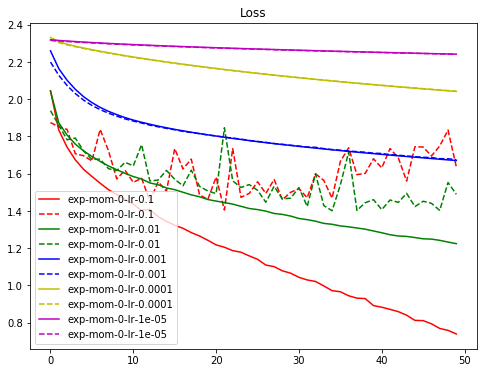

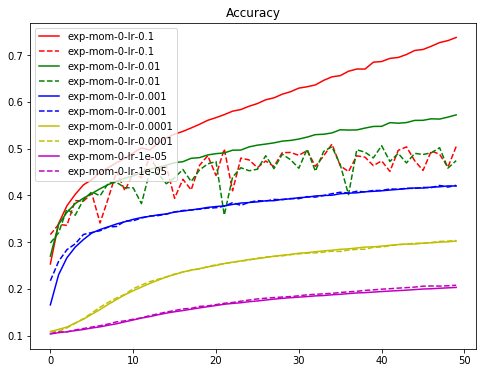

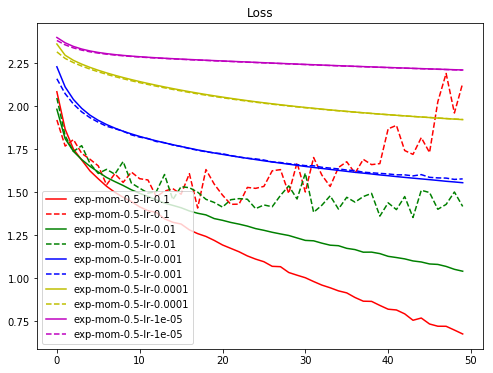

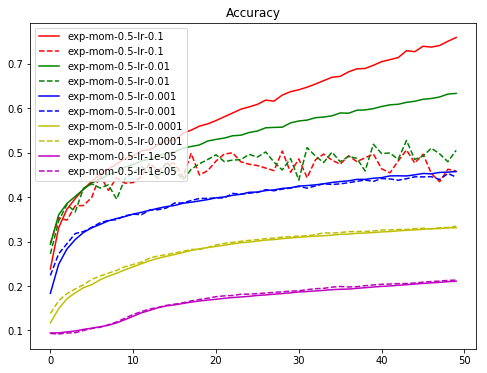

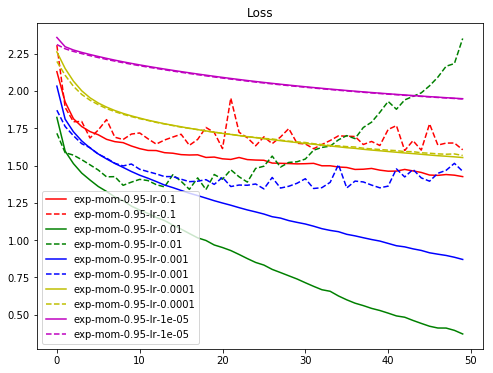

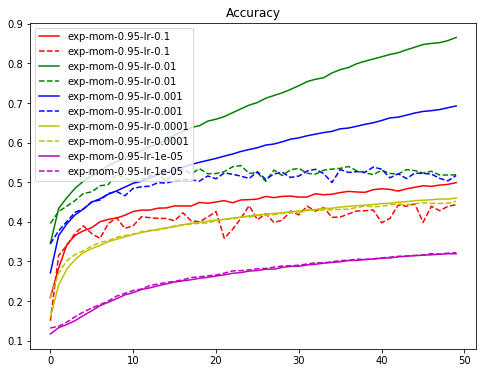

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ['r','g','b','y','m']

# MOMENTUM = 0
plt.figure(figsize=(8,6))
for i,cond in enumerate(name[0:5]):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i,cond in enumerate(name[0:5]):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# MOMENTUM = 0.5
plt.figure(figsize=(8,6))
for i,cond in enumerate(name[5:10]):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i,cond in enumerate(name[5:10]):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# MOMENTUM = 0.95
plt.figure(figsize=(8,6))
for i,cond in enumerate(name[10:15]):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i,cond in enumerate(name[10:15]):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html

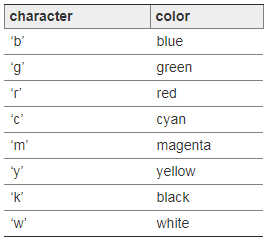